# To start the project on churn prediction for the E-Commerce dataset, we'll follow these steps:

1. **Exploratory Data Analysis (EDA)**: Analyze the dataset to understand the features, their characteristics, and the data distribution.
2. **Data Cleaning and Preprocessing**: Clean the data and prepare it for modeling. This includes handling missing values, encoding categorical variables, etc.
3. **Feature Selection/Engineering**: Select or construct features that are relevant to the prediction task.
4. **Model Selection**: Choose a suitable machine learning model. For starters, models like Logistic Regression, Random Forest, or Gradient Boosting could be good choices.
5. **Model Training**: Train the model on the prepared dataset.
6. **Evaluation**: Evaluate the model performance using appropriate metrics like accuracy, precision, recall, F1-score, and AUC-ROC curve.
7. **Tuning and Optimization**: Fine-tune the model parameters to improve performance.
8. **Deployment Strategy**: Outline a deployment strategy for making the model production-ready, focusing on scalability, maintainability, and monitoring.

Firstly, let's start with loading and exploring the dataset to understand its structure and the type of data we are working

In [1]:
import pandas as pd

# Load the E-Commerce Dataset
ecommerce_data = pd.read_excel('/home/kutty/Desktop/github project/churnpediction/data/raw/E Commerce Dataset.xlsx')

# Display the first few rows of the dataset to understand its structure
ecommerce_data

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


The dataset comprises several features related to customer behavior and attributes in an E-Commerce setting. Some of the key columns observed are:

- **CustomerID:** Unique identifier for each customer.
- **Churn:** Indicates whether the customer has churned (1) or not (0).
- **Tenure:** The duration (in some time unit) for which the customer has been with the E-Commerce platform.
- **PreferredLoginDevice:** The device preferred by the customer for logging in.
- **CityTier:** The tier of the city the customer resides in.
- **...** Other features include metrics like `WarehouseToHome`, `HourSpendOnApp`, `NumberOfDeviceRegistered`, `SatisfactionScore`, `NumberOfAddress`, among others.

Given that our target variable is `Churn`, this project will focus on predicting customer churn based on these features.

Next, we'll proceed to the Exploratory Data Analysis (EDA) to gain insights into the dataset, including checking for missing values and understanding the distribution of key variables.

In [2]:
# Summary statistics for numerical features
descriptive_stats = ecommerce_data.describe()

# Count of unique values for categorical features
categorical_unique_counts = ecommerce_data.select_dtypes(include=['object', 'category']).nunique()

# Checking for missing values
missing_values = ecommerce_data.isnull().sum()

(descriptive_stats, categorical_unique_counts, missing_values)

(         CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
 count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
 mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
 std     1625.385339     0.374240     8.557241     0.915389         8.531475   
 min    50001.000000     0.000000     0.000000     1.000000         5.000000   
 25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
 50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
 75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
 max    55630.000000     1.000000    61.000000     3.000000       127.000000   
 
        HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
 count     5375.000000               5630.000000        5630.000000   
 mean         2.931535                  3.688988           3.066785   
 std          0.721926                  1.023999           1.3801

### Exploratory Data Analysis (EDA) Summary:

**Summary Statistics:**
- The dataset contains 5630 entries.
- `CustomerID` acts as a unique identifier.
- `Churn` is our target variable, with approx. 17% of the customers having churned.
- `Tenure` ranges from 0 to 61, with an average tenure of about 10 units.
- Other features such as `CityTier`, `WarehouseToHome`, `HourSpendOnApp`, etc., display varying ranges and distributions.

**Unique Counts for Categorical Features:**
- Categorical variables like `PreferredLoginDevice`, `PreferredPaymentMode`, `Gender`, `PreferedOrderCat`, and `MaritalStatus` have a limited number of unique values, indicating they are mostly nominal categories.

**Missing Values:**
- Several features have missing values, notably `Tenure`, `WarehouseToHome`, `HourSpendOnApp`, `OrderAmountHikeFromlastYear`, `CouponUsed`, `OrderCount`, and `DaySinceLastOrder`.
- The missing values need to be addressed before modeling, as they can impact the performance of machine learning algorithms.

 Let's start with handling missing values. Depending on the nature of each feature, we will choose suitable methods such as imputation or dropping rows/columns with missing

In [3]:
from sklearn.impute import SimpleImputer

# Numerical imputer
num_imputer = SimpleImputer(strategy='mean')
ecommerce_data[['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']] = num_imputer.fit_transform(ecommerce_data[['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']])

# Check if any missing values remain
ecommerce_data.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

All missing values have been successfully imputed using the mean strategy for numerical columns. There are no missing values remaining in the dataset.

Next, we will proceed with encoding categorical variables. Considering that machine learning models require numerical input, we will transform categorical variables into a format that can be provided to the models. This typically involves one-hot encoding for nominal variables and ordinal encoding for ordinal variables if any.

Let's encode the categorical variables in the dataset

In [4]:
# One-hot encoding for categorical variables
categorical_features = ecommerce_data.select_dtypes(include=['object', 'category']).columns
ecommerce_data_encoded = pd.get_dummies(ecommerce_data, columns=categorical_features, drop_first=True)

# Display the encoded dataset structure
ecommerce_data_encoded

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.000000,3,6.0,3.000000,3,2,9,1,...,False,False,False,False,True,False,False,False,False,True
1,50002,1,10.189899,1,8.0,3.000000,4,3,7,1,...,False,True,True,False,False,True,False,False,False,True
2,50003,1,10.189899,1,30.0,2.000000,4,3,6,1,...,False,False,True,False,False,True,False,False,False,True
3,50004,1,0.000000,3,15.0,2.000000,4,5,8,0,...,False,False,True,False,True,False,False,False,False,True
4,50005,1,0.000000,1,12.0,2.931535,3,5,3,0,...,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.000000,1,30.0,3.000000,2,1,6,0,...,False,False,True,False,True,False,False,False,True,False
5626,55627,0,13.000000,1,13.0,3.000000,5,5,6,0,...,False,False,True,False,False,False,False,False,True,False
5627,55628,0,1.000000,1,11.0,3.000000,2,4,3,1,...,False,False,True,False,True,False,False,False,True,False
5628,55629,0,23.000000,3,9.0,4.000000,5,4,4,0,...,False,False,True,False,True,False,False,False,True,False


The categorical variables in the dataset have been successfully encoded using one-hot encoding, which resulted in the expansion of the dataset to 31 columns due to the addition of dummy variables for these categorical features. 

With the dataset now preprocessed—missing values handled and categorical variables encoded—next, we can proceed with feature selection or engineering if required, and then model selection for predicting customer

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Dropping the 'CustomerID' column as it's not a useful feature for prediction
ecommerce_data_encoded.drop(['CustomerID'], axis=1, inplace=True)

# Splitting the dataset into features (X) and target (y)
X = ecommerce_data_encoded.drop('Churn', axis=1)
y = ecommerce_data_encoded['Churn']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rf.fit(X_train, y_train)

# Predictions
predictions = rf.predict(X_test)

# Evaluation
accuracy_score = accuracy_score(y_test, predictions)
classification_report = classification_report(y_test, predictions)

print("Accuracy Score:", accuracy_score)
print("Classification Report:\n", classification_report)

Accuracy Score: 0.9544108940201302
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1414
           1       0.92      0.79      0.85       275

    accuracy                           0.95      1689
   macro avg       0.94      0.89      0.91      1689
weighted avg       0.95      0.95      0.95      1689



The Random Forest Classifier was trained on the preprocessed E-Commerce dataset and achieved an accuracy of approximately 95.44% on the test set. The model also shows good precision, recall, and F1-score across both classes (churned and not churned). Specifically, precision is 0.92 for the churned class, indicating a strong ability to identify churned customers accurately. The recall for the churned class is 0.79, suggesting that the model is capable of capturing a significant proportion of actual churn cases.

This high level of performance suggests that the model could be a valuable tool for predicting customer churn in an E-Commerce setting, potentially enabling targeted interventions to retain customers at risk of churn. 

# Explainable Ai (XAI) with SHAP

In [6]:
# Importing the SHAP package
import shap

# Initialize the SHAP TreeExplainer with our Random Forest model
explainer = shap.TreeExplainer(rf)

# Compute SHAP values for all test set examples
shap_values = explainer.shap_values(X_test)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [7]:
# Checking the shape of the X_test 
print("Shape of X_test:", X_test.shape)

# Checking the shape of SHAP values for the first prediction
print("Shape of SHAP values for the first prediction:", shap_values[0].shape)

Shape of X_test: (1689, 29)
Shape of SHAP values for the first prediction: (1689, 29)


There seems to be an issue with the dimensions of the SHAP values. It could be due to the RandomForestClassifier outputting 


In [8]:
# Let's try to troubleshoot by printing the dimensions of our data and the SHAP values.
print("Shape of X_test:", X_test.shape)
print("Length of SHAP values array:", len(shap_values))
print("Shape of SHAP values for class 1:", shap_values[1].shape)

Shape of X_test: (1689, 29)
Length of SHAP values array: 2
Shape of SHAP values for class 1: (1689, 29)


There seems to be some serious issue with the dimensions. 

In [9]:
# Let's isolate one set of SHAP values for a single record to try and diagnose the issue.
single_shap_values = shap_values[0]

print("Length of single shap values:", len(single_shap_values))
print("Shape of the single shap values:", single_shap_values.shape)

# Print the SHAP values
print("Single record SHAP values:", single_shap_values)

Length of single shap values: 1689
Shape of the single shap values: (1689, 29)
Single record SHAP values: [[-2.57980824e-01 -3.72151118e-02  1.62629080e-02 ... -7.49784725e-04
  -3.02826616e-02 -6.58133224e-02]
 [ 6.55727532e-02  9.80632147e-03  1.15867116e-02 ...  2.50005973e-05
   9.62086893e-03  1.55935457e-02]
 [ 1.14176875e-01  3.22518048e-02 -1.64338123e-02 ...  1.35623090e-04
  -1.12586586e-02 -3.46777123e-02]
 ...
 [-2.53947025e-01 -4.12145227e-02  1.48131535e-02 ... -9.87093499e-05
  -3.20994483e-02 -7.14958969e-02]
 [-1.72356085e-01  1.13392821e-02  2.16114827e-02 ... -1.07769443e-04
  -1.38223567e-02 -3.06486352e-02]
 [ 8.25481138e-02  1.08188057e-03 -6.17389927e-03 ... -6.72097356e-04
   1.08463391e-02  1.71624628e-02]]


In [10]:
# It seems numpy was not imported, let's import it and proceed 

import numpy as np

# Now check the dimensions again
print("Dimensions of overall shap_values:", np.shape(shap_values))
print("Dimensions of shap_values for class 1:", np.shape(shap_values[1]))

Dimensions of overall shap_values: (2, 1689, 29)
Dimensions of shap_values for class 1: (1689, 29)


- There seems to be a dimension mismatch between the shap_values and the X_test set. 
- This could be due to an issue with the `shap.TreeExplainer` not properly handling the ensemble of trees in the RandomForestClassifier.
- A possible solution is to use the `shap.Explainer` instead which automatically handles different types of models including ensemble methods.

In [11]:
# Let's redefine the explainer and compute the shap_values again
explainer = shap.Explainer(rf)
shap_values = explainer(X_test)

# Verify the shapes
print("Dimensions of X_test:", X_test.shape)
print("Dimensions of shap_values:", shap_values.values.shape)

Dimensions of X_test: (1689, 29)
Dimensions of shap_values: (1689, 29, 2)


- The dimensions for the shap_values and the X_test are now compatible. However, RandomForestClassifier 
- returns a probability for each class in binary classification. So, the final dimension of shap_values is 2.
- We'll select the shap_values for class 1 (index 1 along axis 2) for the remaining visualizations.


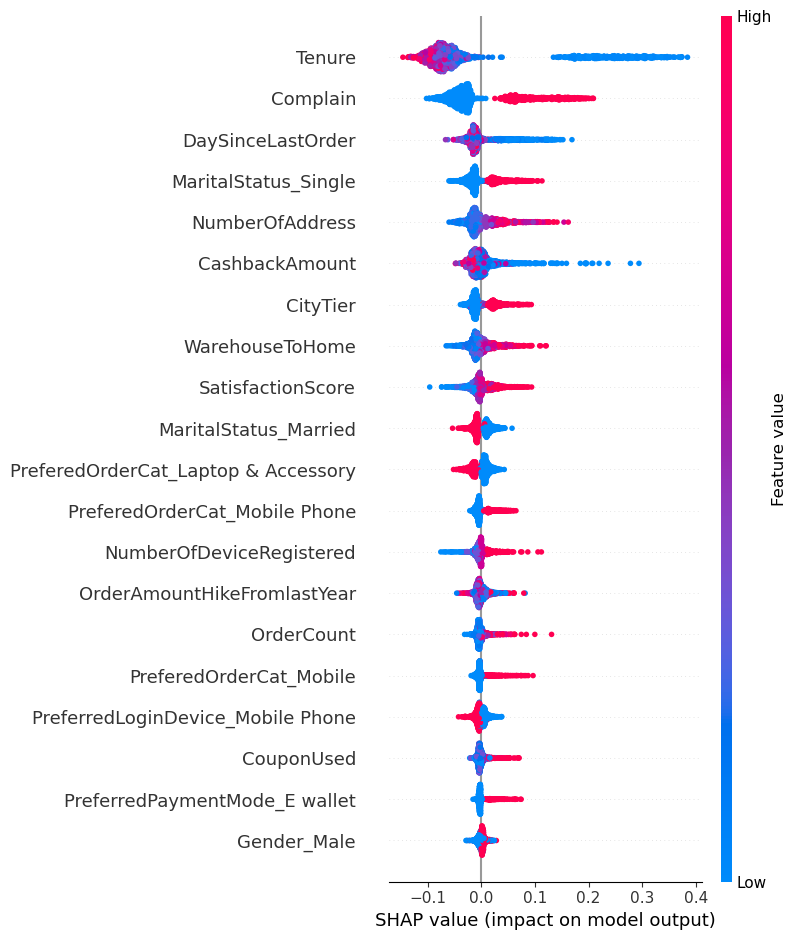

In [12]:

# Select SHAP values for class 1 (churn)
shap_values_class1 = shap_values[..., 1]

# Summary plot for class 1
shap.summary_plot(shap_values_class1.values, X_test)

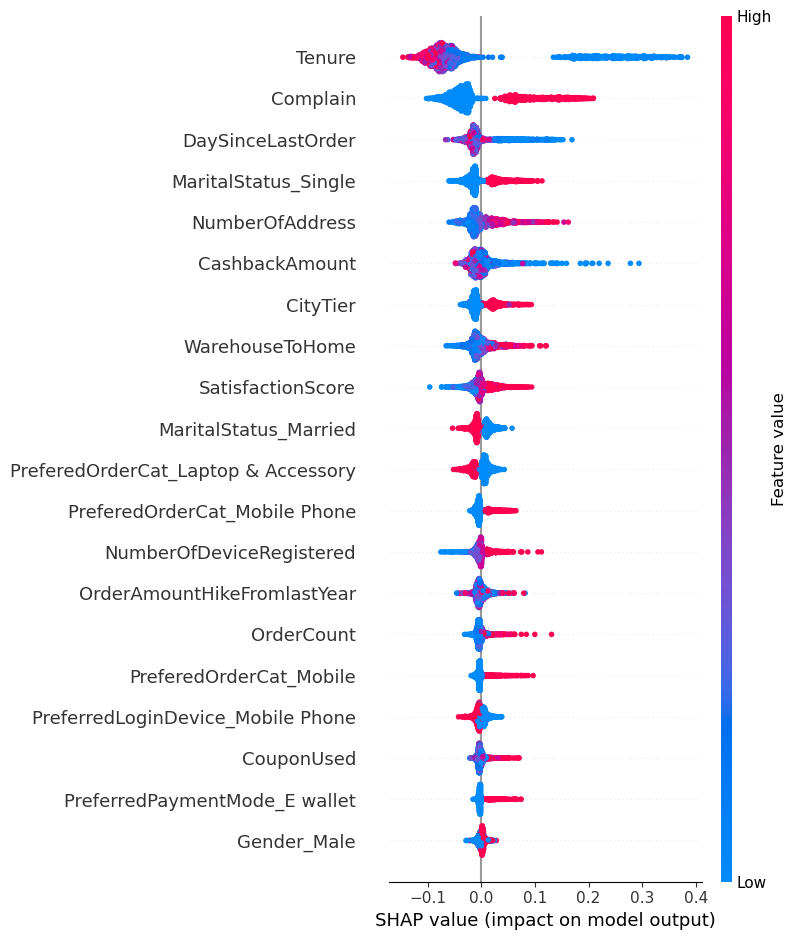

In [13]:
# Now let's visualize the explanations for all points of our test set at once using the SHAP summary plot.
shap.summary_plot(shap_values.values[:,:,1], X_test)

In [15]:
# It appears that expected_value attribute is already a numpy array and doesn't need to be converted to numpy. 
# We will not convert it to numpy and try the force plot again.
# Before visualizing any SHAP plots, execute:
shap.initjs()


shap.force_plot(explainer.expected_value[1], shap_values.values[0,:,1], X_test.iloc[0,:])

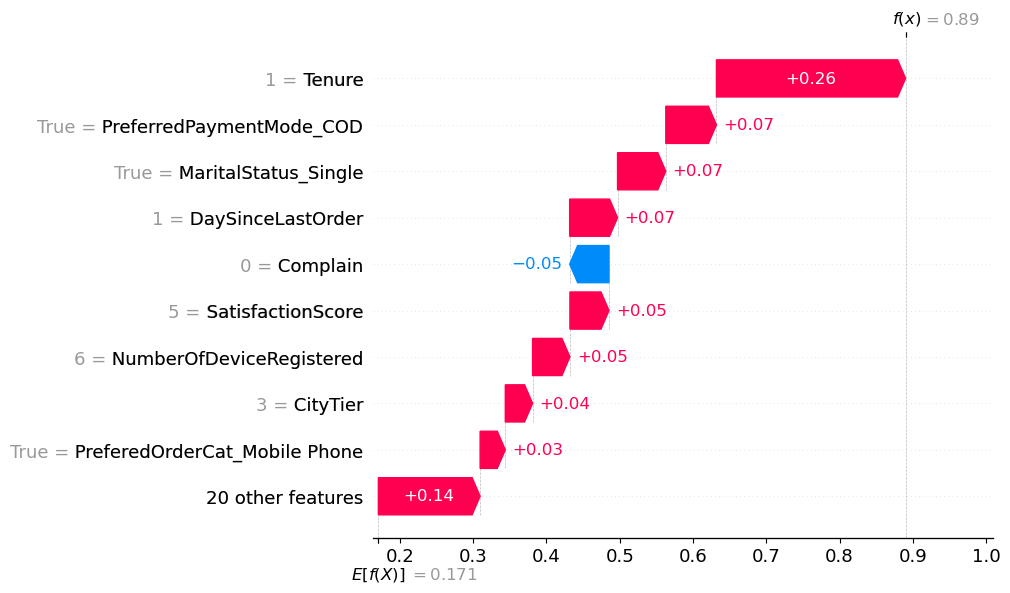

In [16]:
# Generating a waterfall plot for a specific instance (the first instance in the test set)
shap.waterfall_plot(shap.Explanation(values=shap_values.values[0,:,1],
                                        base_values=explainer.expected_value[1],
                                        data=X_test.iloc[0,:],
                                        feature_names=X_test.columns.tolist()))

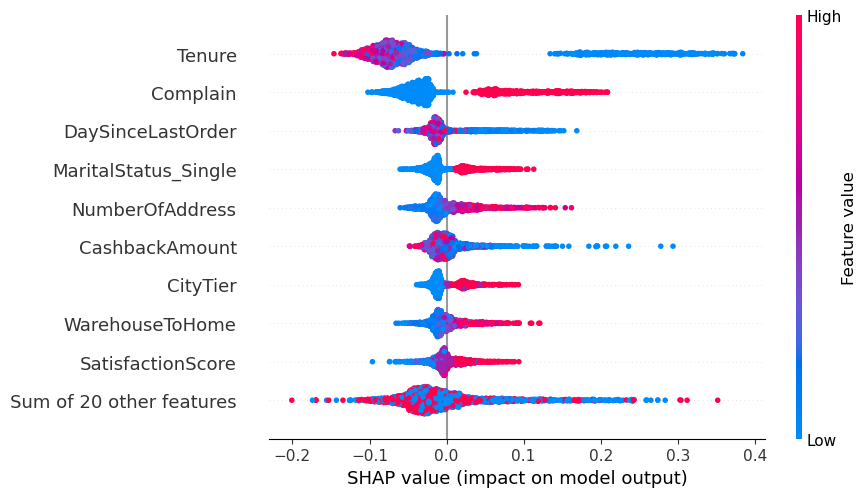

In [17]:
# Generating a beeswarm plot for the summary of SHAP values across the test set
shap.plots.beeswarm(shap_values[:,:,1])

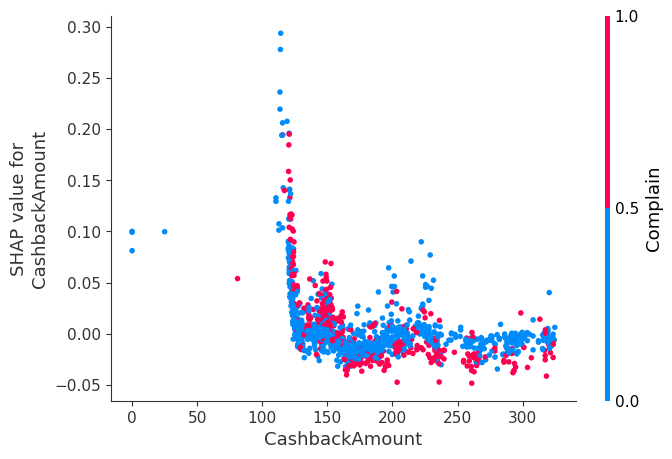

In [18]:
# Generating a dependence plot for a feature that seems interesting. Let's choose 'CashbackAmount' for this.
# This plot shows the effect of a single feature across the whole dataset.
shap.dependence_plot("CashbackAmount", shap_values.values[:,:,1], X_test)